# Overview

The purpose of this notebook is to find any trends between Hot 100 Songs each year with the current Spotify Popularity Score. 

The Data section reads in 'columns_final_df.json' into a pandas dataframe. It is then cleaned and a scatterplot is displayed with a regression line and its correlation coefficient.

The Analysis section gives some insight of these findings.

# Data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import linregress
from pathlib import Path

In [6]:
# Load data
file_path = Path("../data/columns_final_df.json")
df = pd.read_json(file_path)

In [7]:
# Select data for a specific year, e.g., 2006
year = 2024
df_year = df[df["Year"] == year]

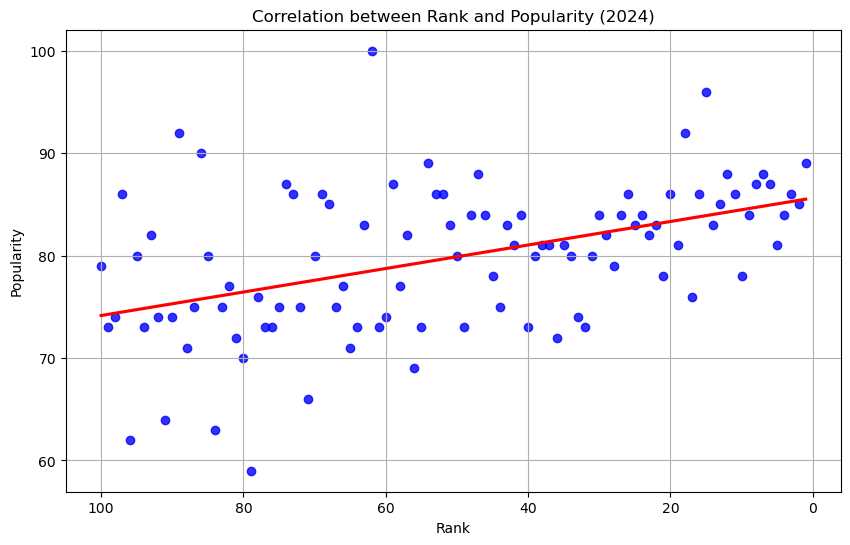

In [17]:
# Scatter plot to visualize correlation
plt.figure(figsize=(10, 6))
sns.regplot(x=df_year["Rank"], y=df_year["Popularity"], scatter=True, color="blue", line_kws={"color": "red"}, ci=None)
plt.xlabel("Rank")
plt.ylabel("Popularity")
plt.title(f"Correlation between Rank and Popularity ({year})")
plt.gca().invert_xaxis()  # Rank 1 should be on the left
plt.grid(True)
plt.show()

In [18]:
# Calculate correlation coefficient
correlation = df_year["Rank"].corr(df_year["Popularity"])
print(f"Correlation coefficient between Rank and Popularity in {year}: {correlation:.2f}")

Correlation coefficient between Rank and Popularity in 2024: -0.46


In [19]:
# Extract relevant columns (Rank and Popularity) for correlation analysis
df_filtered = df[['Rank', 'Popularity']].dropna()

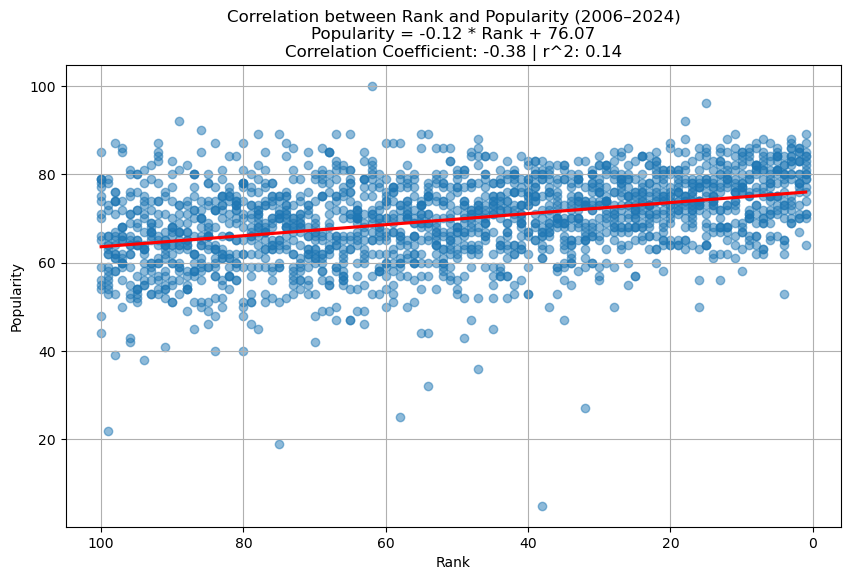

In [24]:
# Calculate correlation coefficient for all years
correlation_all = df_filtered["Rank"].corr(df_filtered["Popularity"])

# Perform linear regression to get equation
slope, intercept, r_value, p_value, std_err = linregress(df_filtered["Rank"], df_filtered["Popularity"])
regression_eq = f"Popularity = {slope:.2f} * Rank + {intercept:.2f}"

#r^2 value
r_squared = r_value ** 2

# Create scatter plot with trend line
plt.figure(figsize=(10, 6))
sns.regplot(x=df_filtered['Rank'], y=df_filtered['Popularity'], scatter_kws={'alpha':0.5}, line_kws={"color":"red"}, ci=None)
plt.gca().invert_xaxis()

# Plot labels and title
plt.title(f"Correlation between Rank and Popularity (2006–2024)\n{regression_eq}\n"
          f"Correlation Coefficient: {r_value:.2f} | r^2: {r_squared:.2f}")
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

In [26]:
# Print results
print(f"Regression Equation: {regression_eq}")
print(f"Correlation Coefficient: {r_value:.2f}")
print(f"r^2: {r_squared:.2f}")

Regression Equation: Popularity = -0.12 * Rank + 76.07
Correlation Coefficient: -0.38
r^2: 0.14


# Analysis

The correlation coefficient of -0.38 is considered a weak to moderate correlation. There is a slight trend suggesting that songs with higher rank tend to have higher popularity, however since the slope is relatively small, the effect isn’t very strong.

The regression equation shows that Popularity score goes up about 0.12 points for every hot 100 Rank.

The r^2 value of 0.14 means that only 14% of the variation in Popularity is explained by Rank. This suggests that Rank is not a strong predictor of Popularity and there are many other factors that influence Popularity score.

Some of the outliers are likely due to songs becoming popular again through social media like TikTok trends and the fact that Spotify’s Popularity score is calculated based on factors like total streams, recent plays, save rate, share rate, and how often a song is added to playlists.
